<a href="https://colab.research.google.com/github/CanelitACane/Reto_1_data_science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
print(tienda.columns)
print(tienda2.columns)
print(tienda3.columns)
print(tienda4.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [5]:
# Primero agregamos una columna indicando de qué tienda son los datos
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todos los DataFrames
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Mostramos las primeras filas del nuevo DataFrame
df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [6]:
# Ingresos totales por tienda
ingresos_por_tienda = df.groupby('Tienda')['Precio'].sum()
print(ingresos_por_tienda)


Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


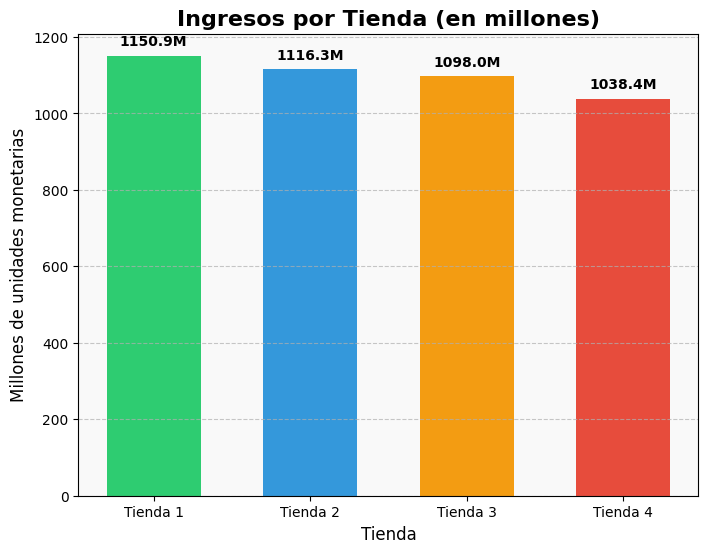

In [8]:
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))  # tamaño más grande para que se vea mejor

# Gráfico de barras mejorado
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']  # verde, azul, naranja, rojo
bars = ax.bar(ingresos_por_tienda.index, ingresos_por_tienda.values/1e6, color=colors, width=0.6)

# Agregar etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}M',  # Mostrar en millones (M)
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # un poco arriba
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Mejoras de estética
ax.set_title('Ingresos por Tienda (en millones)', fontsize=16, fontweight='bold')
ax.set_ylabel('Millones de unidades monetarias', fontsize=12)
ax.set_xlabel('Tienda', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#f9f9f9')  # Fondo clarito

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


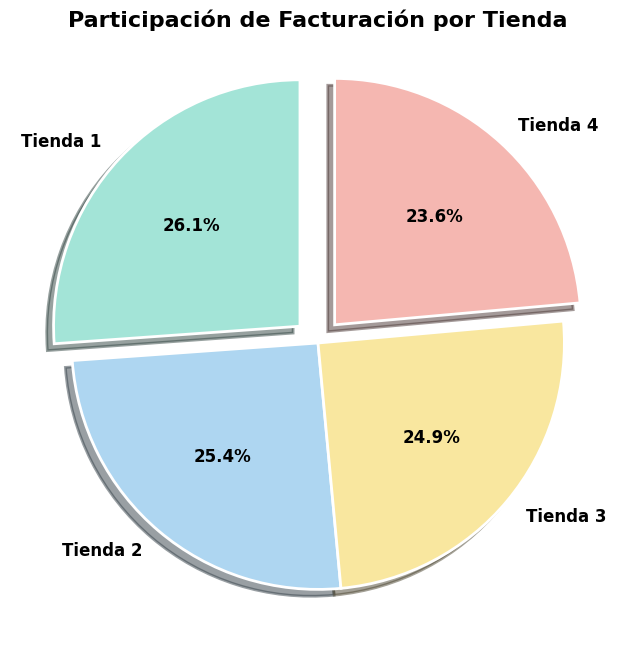

In [11]:
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8))

# Definimos colores pastel lindos
colors = ['#a3e4d7', '#aed6f1', '#f9e79f', '#f5b7b1']

# Explota (separa) Tienda 1 y Tienda 4
explode = (0.1, 0, 0, 0.1)

# Gráfico de pastel mejorado
ax.pie(
    ingresos_por_tienda.values,
    labels=ingresos_por_tienda.index,
    autopct=lambda pct: f'{pct:.1f}%',  # porcentaje con 1 decimal
    startangle=90,  # empieza desde arriba
    colors=colors,  # colores pastel
    explode=explode,  # explotar Tienda 1 y 4
    shadow=True,  # sombra 3D
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # bordes blancos
    textprops={'fontsize': 12, 'weight': 'bold'}  # textos grandes y en negrita
)

# Título bonito
ax.set_title('Participación de Facturación por Tienda', fontsize=16, fontweight='bold')

# Mostrar gráfico
plt.show()


# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda